# Practical 3: Artificial Neural Network

This is the first task of Practical 3. You will build a neural network to classify the handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/). 
You will build the classifier from scartch. 

We will mark your code based on the accuracy of your model. You should get **at least 97%** accuracy on this dataset. Don't forget to save and check in your model. 

## Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.7.0'

In [ ]:
tf.keras.__version__

'2.7.0'

## Prepare the dataset

In this block, you will prepare the data for the training, such as normalisation. 

11501568/11490434 [==============================] - 0s 0us/step


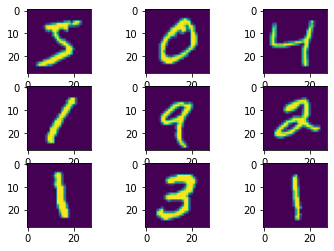

(60000, 28, 28)

In [ ]:
from keras.datasets import mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
plt.show()

X_train_full.shape

In [ ]:
# reshaping of data
X_train_fullr = X_train_full.reshape((X_train_full.shape[0], X_train_full.shape[1], X_train_full.shape[2], 1))
X_testr = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
print('Reshaped training data shape', X_train_fullr.shape)
print('Reshaped testing data shape', X_testr.shape)

Reshaped training data shape (60000, 28, 28, 1)
Reshaped testing data shape (10000, 28, 28, 1)


In [ ]:
# normalisation too range of 0 to 1
X_train_fullr = X_train_fullr / 255
X_testr = X_testr / 255

In [ ]:
nlabels = len(np.unique(y_train_full)) # number of unique labels


# one-hot encoding of labels
y_trainl = np.zeros((y_train_full.shape[0], nlabels))
y_testl  = np.zeros((y_test.shape[0], nlabels))

for i in range(0,y_train_full.shape[0]):   
    y_trainl[i, y_train_full[i].astype(int)]=1
    
for i in range(0,y_test.shape[0]):    
    y_testl[i, y_test[i].astype(int)]=1

## Build and train the model

Build and train your model. 

In [ ]:
# TODO: Build your model

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten



input_dimension = (X_train_full.shape[1], X_train_full.shape[2], 1) #764 = 28 * 28

model = Sequential()

# 2D conv layers with relu activation and 2D max pool
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=input_dimension))
model.add(MaxPooling2D((3, 3)))

# 2D conv layers with relu activation and 2D max pool
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# linear layers with relu activation
model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(nlabels, activation='softmax'))
model.compile(Adam(learning_rate=0.001), # optimizer
              loss='categorical_crossentropy', #loss function
              metrics=['accuracy'])

In [ ]:
# show the structure of your model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 16)          4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 144)               0         
                                                                 
 dense (Dense)               (None, 150)               2

In [ ]:
# used to open connection with my google drive account since
# I trained the model on google colab
# DO NOT RUN THIS FOR MARKING PURPOSES
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
history = model.fit(X_train_fullr, y_trainl, validation_split=0.2, epochs=6, batch_size=32, verbose=1, shuffle=1)

Epoch 1/6
1500/1500 [==============================] - 15s 4ms/step - loss: 0.2183 - accuracy: 0.9327 - val_loss: 0.1197 - val_accuracy: 0.9633
Epoch 2/6
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0650 - accuracy: 0.9799 - val_loss: 0.0665 - val_accuracy: 0.9797
Epoch 3/6
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0486 - accuracy: 0.9850 - val_loss: 0.0577 - val_accuracy: 0.9827
Epoch 4/6
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0391 - accuracy: 0.9879 - val_loss: 0.0450 - val_accuracy: 0.9871
Epoch 5/6
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0317 - accuracy: 0.9897 - val_loss: 0.0382 - val_accuracy: 0.9887
Epoch 6/6
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0284 - accuracy: 0.9908 - val_loss: 0.0381 - val_accuracy: 0.9887


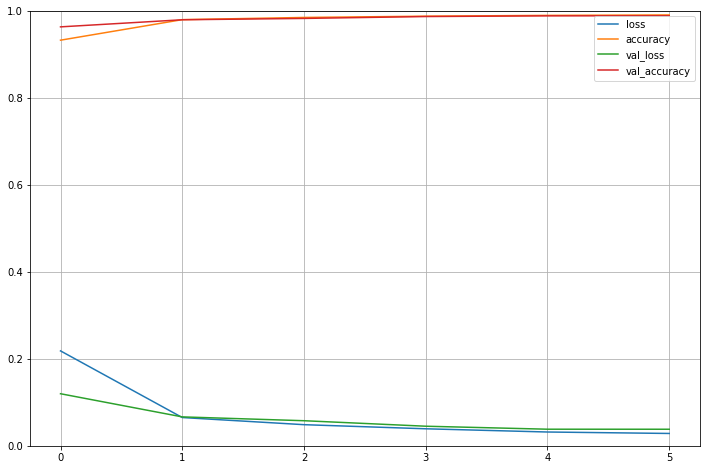

In [ ]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

In [ ]:
#model.save('/content/drive/MyDrive/P3/CNN/mnist.h5') THIS WAS USED TO STORE THE MODEL IN MY DRIVE
model.save('FDS21-M140-MNIST.h5') # change the file name according to your repository name

## Load the model and evaluate it on the test data

In [ ]:
# model = keras.models.load_model("/content/drive/MyDrive/P3/CNN/mnist.h5") THIS WAS USED TO LOAD THE MODEL FROM MY DRIVE
model = keras.models.load_model("FDS21-M140-MNIST.h5")
model.evaluate(X_testr, y_testl)

313/313 [==============================] - 1s 3ms/step - loss: 0.0353 - accuracy: 0.9884


[0.03525395691394806, 0.9883999824523926]

## Short report

Please write briefly how you build and train the model. Please include the decisions you made, such as why you use x number layers, and the difficulties you met.

The architecture chosen for this model is following the sandwich architecture of the LeNet model: introduced in 1998 in the paper "Gradient-Based Learning Applied To Document Recognition" by Yann LeCun, Leon Bottou, Yoshua Bengio, and Patrick Haffner. 

 Link: http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf

Firstly the data had to be normalised, since each pixel had a value of 0 to 255, this resulted to each pixel having a value of 0 to 1. Normalizing the data generally speeds up learning and leads to faster convergence.

2 convolution layers with relu activation are designed to learn to extract relevant features from the image input. In order to get the best features from each convolution layer, max pooling was introduced after each convolution layer. After that, 3 fully connected layers with relu activation are introduced with a pyramid architecture. Pyramid architecture means that the size of the layers decreasing as it is going deeper. Thus, the first layer has size 150 neuros, the second 50 and lastly coming down to the number of labels to output the outcome label of the inputs.

The optimizer used was Adam, which makes the learning process much faster. Various values for epochs were used and the number 6 was the winner since larger values resulted in Adam making the model overfit to the training data.
Moreover, the default learning rate of Adam from Keras is 0.01, but again due to overfitting issues, the learning rate was changed to 0.001.

For weights initialization, Glorot uniform was used, or Xavier, which is the default in Keras. This was preferred since Xavier initialisation tries to make the variance of the activations the same across every layer. This constant variance helps prevent the gradient from exploding or vanishing and thus theoretically make the model reach the global minimum faster, or avoid reaching a local minimum.

The model managed to exceed the 97% mark that is asked. and reached a 98.99% of validation data accuracy and 98.84% of test data accuracy.

